<a href="https://colab.research.google.com/github/31indianaSKKU/SportsBigDataAnalysis_2022FALL/blob/main/HW05_pca_t_sne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline     
%matplotlib notebook    

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE

import numpy as np

**Load** Dataset

In [99]:
players = pd.read_csv('https://github.com/MLSLab/dataset-students/raw/main/dataset/players20.csv')

In [100]:
players

,Team,Player,#,Class,Pos,Height,Weight,Hometown,High School,Summary,...,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM
0,Youngstown State Penguins,Darius Quisenberry,3.0,SO,G,06월 01일,186.0,"Springfield, OH",Huber Heights Wayne HS,"16.7 Pts, 3.7 Reb, 4.1 Ast",...,0.2,14.4,28.3,2.7,0.9,3.7,0.156,2.9,-1.6,1.3
1,Youngstown State Penguins,Naz Bohannon,33.0,JR,F,06월 06일,230.0,"Lorain, OH",Lorain High School,"11.1 Pts, 8.8 Reb, 2.4 Ast",...,0.6,19.0,19.2,1.9,0.8,2.7,0.111,0.2,0.0,0.2
2,Youngstown State Penguins,Michael Akuchie,31.0,JR,F,06월 08일,212.0,"Plantation, FL",St. Thomas Aquinas High School,"9.1 Pts, 6.2 Reb, 0.6 Ast",...,2.9,9.4,18.0,1.7,1.0,2.7,0.139,1.0,-0.3,0.7
3,Youngstown State Penguins,Garrett Covington,32.0,JR,G,06월 05일,216.0,"Carmel, IN",Carmel High School,"8.0 Pts, 3.7 Reb, 0.8 Ast",...,0.5,13.4,18.6,0.7,0.4,1.2,0.063,-2.4,-2.1,-4.6
4,Youngstown State Penguins,Donel Cathcart III,13.0,SR,G,06월 05일,190.0,"Buffalo, NY",Cardinal O'Hara HS,"7.1 Pts, 3.1 Reb, 1.2 Ast",...,0.9,13.6,18.2,0.9,0.5,1.4,0.085,-1.2,-1.9,-3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5447,Abilene Christian Wildcats,Mahki Morris,12.0,FR,G,06월 03일,184.0,"Philadelphia, PA",Delaware Valley (PA),"3.8 Pts, 1.6 Reb, 0.6 Ast",...,0.6,18.1,21.2,0.1,0.4,0.6,0.116,-2.0,0.3,-1.7
5448,Abilene Christian Wildcats,Trey Lenox,14.0,SR,G,06월 03일,220.0,"Hot Springs, AR",Hot Springs High School,"2.2 Pts, 1.2 Reb, 1.3 Ast",...,0.9,20.8,10.1,0.1,0.9,1.0,0.097,-3.3,1.4,-1.9
5449,Abilene Christian Wildcats,Tobias Cameron,11.0,SO,G,06월 05일,210.0,"Gold Coast, Australia",Hillcrest Christian Academy,"1.8 Pts, 1.0 Reb, 0.6 Ast",...,1.0,19.4,18.5,0.2,0.3,0.5,0.172,0.7,0.7,1.4
5450,Abilene Christian Wildcats,Paul Hiepler,33.0,JR,G,06월 04일,170.0,"Camarillo, CA",Oaks Christian High School,"2.3 Pts, 0.3 Reb, 0.2 Ast",...,0.0,4.3,21.5,0.2,0.1,0.3,0.195,3.6,-6.1,-2.4


In [101]:
#특정 데이터 불러오기
playersselected = players[(players['MP']>0)&(players['Pos']=='G')|(players['Pos']=='F')]

In [102]:
playersselected

,Team,Player,#,Class,Pos,Height,Weight,Hometown,High School,Summary,...,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM
0,Youngstown State Penguins,Darius Quisenberry,3.0,SO,G,06월 01일,186.0,"Springfield, OH",Huber Heights Wayne HS,"16.7 Pts, 3.7 Reb, 4.1 Ast",...,0.2,14.4,28.3,2.7,0.9,3.7,0.156,2.9,-1.6,1.3
1,Youngstown State Penguins,Naz Bohannon,33.0,JR,F,06월 06일,230.0,"Lorain, OH",Lorain High School,"11.1 Pts, 8.8 Reb, 2.4 Ast",...,0.6,19.0,19.2,1.9,0.8,2.7,0.111,0.2,0.0,0.2
2,Youngstown State Penguins,Michael Akuchie,31.0,JR,F,06월 08일,212.0,"Plantation, FL",St. Thomas Aquinas High School,"9.1 Pts, 6.2 Reb, 0.6 Ast",...,2.9,9.4,18.0,1.7,1.0,2.7,0.139,1.0,-0.3,0.7
3,Youngstown State Penguins,Garrett Covington,32.0,JR,G,06월 05일,216.0,"Carmel, IN",Carmel High School,"8.0 Pts, 3.7 Reb, 0.8 Ast",...,0.5,13.4,18.6,0.7,0.4,1.2,0.063,-2.4,-2.1,-4.6
4,Youngstown State Penguins,Donel Cathcart III,13.0,SR,G,06월 05일,190.0,"Buffalo, NY",Cardinal O'Hara HS,"7.1 Pts, 3.1 Reb, 1.2 Ast",...,0.9,13.6,18.2,0.9,0.5,1.4,0.085,-1.2,-1.9,-3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5446,Abilene Christian Wildcats,Reggie Miller,1.0,JR,G,6-0,150.0,"Houston, TX",Klein Forest High School,"2.8 Pts, 2.1 Reb, 2.1 Ast",...,0.7,29.7,13.4,-0.3,1.2,0.8,0.064,-4.9,1.8,-3.2
5447,Abilene Christian Wildcats,Mahki Morris,12.0,FR,G,06월 03일,184.0,"Philadelphia, PA",Delaware Valley (PA),"3.8 Pts, 1.6 Reb, 0.6 Ast",...,0.6,18.1,21.2,0.1,0.4,0.6,0.116,-2.0,0.3,-1.7
5448,Abilene Christian Wildcats,Trey Lenox,14.0,SR,G,06월 03일,220.0,"Hot Springs, AR",Hot Springs High School,"2.2 Pts, 1.2 Reb, 1.3 Ast",...,0.9,20.8,10.1,0.1,0.9,1.0,0.097,-3.3,1.4,-1.9
5449,Abilene Christian Wildcats,Tobias Cameron,11.0,SO,G,06월 05일,210.0,"Gold Coast, Australia",Hillcrest Christian Academy,"1.8 Pts, 1.0 Reb, 0.6 Ast",...,1.0,19.4,18.5,0.2,0.3,0.5,0.172,0.7,0.7,1.4


In [103]:
#결측값 확인
playersselected.isna().sum().sum()   #?????????????????????????????????????????????????????????????

14973

In [104]:
#결측값 제거
playersselected = playersselected.dropna()

In [105]:
playersselected.isna().sum().sum()

0

In [106]:
playersselected.isna().any().sum()   #??????????????????????????????????????????????????????????

0

In [107]:
playersselected = playersselected.reset_index(drop=True)  #index값을 reset. drop = True ???????????????????????????????????

In [108]:
playersselected

,Team,Player,#,Class,Pos,Height,Weight,Hometown,High School,Summary,...,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM
0,Youngstown State Penguins,Darius Quisenberry,3.0,SO,G,06월 01일,186.0,"Springfield, OH",Huber Heights Wayne HS,"16.7 Pts, 3.7 Reb, 4.1 Ast",...,0.2,14.4,28.3,2.7,0.9,3.7,0.156,2.9,-1.6,1.3
1,Youngstown State Penguins,Naz Bohannon,33.0,JR,F,06월 06일,230.0,"Lorain, OH",Lorain High School,"11.1 Pts, 8.8 Reb, 2.4 Ast",...,0.6,19.0,19.2,1.9,0.8,2.7,0.111,0.2,0.0,0.2
2,Youngstown State Penguins,Michael Akuchie,31.0,JR,F,06월 08일,212.0,"Plantation, FL",St. Thomas Aquinas High School,"9.1 Pts, 6.2 Reb, 0.6 Ast",...,2.9,9.4,18.0,1.7,1.0,2.7,0.139,1.0,-0.3,0.7
3,Youngstown State Penguins,Garrett Covington,32.0,JR,G,06월 05일,216.0,"Carmel, IN",Carmel High School,"8.0 Pts, 3.7 Reb, 0.8 Ast",...,0.5,13.4,18.6,0.7,0.4,1.2,0.063,-2.4,-2.1,-4.6
4,Youngstown State Penguins,Donel Cathcart III,13.0,SR,G,06월 05일,190.0,"Buffalo, NY",Cardinal O'Hara HS,"7.1 Pts, 3.1 Reb, 1.2 Ast",...,0.9,13.6,18.2,0.9,0.5,1.4,0.085,-1.2,-1.9,-3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,Abilene Christian Wildcats,Reggie Miller,1.0,JR,G,6-0,150.0,"Houston, TX",Klein Forest High School,"2.8 Pts, 2.1 Reb, 2.1 Ast",...,0.7,29.7,13.4,-0.3,1.2,0.8,0.064,-4.9,1.8,-3.2
3040,Abilene Christian Wildcats,Mahki Morris,12.0,FR,G,06월 03일,184.0,"Philadelphia, PA",Delaware Valley (PA),"3.8 Pts, 1.6 Reb, 0.6 Ast",...,0.6,18.1,21.2,0.1,0.4,0.6,0.116,-2.0,0.3,-1.7
3041,Abilene Christian Wildcats,Trey Lenox,14.0,SR,G,06월 03일,220.0,"Hot Springs, AR",Hot Springs High School,"2.2 Pts, 1.2 Reb, 1.3 Ast",...,0.9,20.8,10.1,0.1,0.9,1.0,0.097,-3.3,1.4,-1.9
3042,Abilene Christian Wildcats,Tobias Cameron,11.0,SO,G,06월 05일,210.0,"Gold Coast, Australia",Hillcrest Christian Academy,"1.8 Pts, 1.0 Reb, 0.6 Ast",...,1.0,19.4,18.5,0.2,0.3,0.5,0.172,0.7,0.7,1.4


Standardize the Data
*   PCA는 데이터 값의 범위에 영향을 받기 때문에 데이터 스케일의 범위를 조정해주는 것이 좋습니다.
*   데이터의 스케일에 따라 주성분의 설명 가능한 분산량이 달라질 수 있기 때문입니다.





In [109]:
X = playersselected

In [110]:
#모든 feature 선택
playersselected.columns

Index(['Team', 'Player', '#', 'Class', 'Pos', 'Height', 'Weight', 'Hometown',
       'High School', 'Summary', 'Rk.x', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Rk.y', 'PER',
       'TS%', 'eFG%', '3PAr', 'FTr', 'PProd', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/40', 'OBPM',
       'DBPM', 'BPM'],
      dtype='object')

In [111]:
X = playersselected[['MP','FG','FGA','FG%','2P','2PA','2P%','3P','3PA','3P%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS','Rk.y','PER','TS%','eFG%','3PAr','FTr','PProd','ORB%','DRB%','TRB%','AST%','STL%','BLK%','TOV%','USG%','OWS','DWS','WS','WS/40','OBPM','DBPM','BPM']]


In [112]:
X = np.array(X)

In [113]:
X.min(), X.max()

(-47.9, 1128.0)

In [114]:
X = StandardScaler().fit_transform(X)

In [115]:
X.min(), X.max()

(-10.233343789834823, 16.283487286311736)

PCA Projection

*   차원 축소했을 때 데이터의 분산 값과 주성분 축 확인해보기

*   explanined_variance는 각 주성분에 얼마나 많은 정보(분산)가 포함될 수 있는지 알 수 있는 지표입니다.



In [116]:
# 몇 개의 주성분을 볼 지 결정
pca = PCA(n_components=5)

In [117]:
pca.fit(X) 

PCA(n_components=5)

In [118]:
Xnew = pca.transform(X)

In [119]:
pca.components_   #eigen-vector

array([[ 0.20581504,  0.21961054,  0.21003801,  0.09837055,  0.20661096,
         0.20578063,  0.05390573,  0.13449799,  0.13571893,  0.0501965 ,
         0.20089274,  0.20218517,  0.07109646,  0.14278433,  0.19959631,
         0.19370849,  0.15651215,  0.17575412,  0.10721596,  0.18741746,
         0.17287642,  0.2192082 , -0.20683975,  0.17109694,  0.10779229,
         0.08892395, -0.05285218,  0.00879193,  0.22148473,  0.02186939,
         0.05566196,  0.04936071,  0.08002537,  0.04218109,  0.02750749,
        -0.0584597 ,  0.11013906,  0.20016812,  0.18336462,  0.21425871,
         0.15257916,  0.14945383,  0.06856156,  0.14401391],
       [-0.10850161, -0.06627565, -0.1267657 ,  0.23082917,  0.04282057,
        -0.00059953,  0.17446505, -0.24013791, -0.24924808, -0.08142238,
        -0.05492795, -0.02355366, -0.11934226,  0.22204711,  0.06313492,
         0.11851209, -0.16449016, -0.10738962,  0.22305679, -0.0936537 ,
         0.02805605, -0.09402311,  0.01580545,  0.12764925,  0.

In [120]:
pca.explained_variance_  #eigen-value

array([18.65485886,  6.190333  ,  4.31832836,  2.32989621,  2.09767981])

In [121]:
pca.explained_variance_ratio_ 

array([0.42383478, 0.14064317, 0.09811158, 0.05293479, 0.04765888])

In [122]:
# 5개의 주성분은 전체 분산의 약 76%를 설명한다
sum(pca.explained_variance_ratio_) 

0.7631832059243748

In [123]:
y_data = pca.explained_variance_ratio_
x_data = np.arange(len(y_data))

In [124]:
y_data

array([0.42383478, 0.14064317, 0.09811158, 0.05293479, 0.04765888])

In [125]:
x_data

array([0, 1, 2, 3, 4])

In [126]:
sum_eig_values = np.cumsum(y_data)  #누적sum

In [127]:
sum_eig_values

array([0.42383478, 0.56447795, 0.66258954, 0.71552433, 0.76318321])

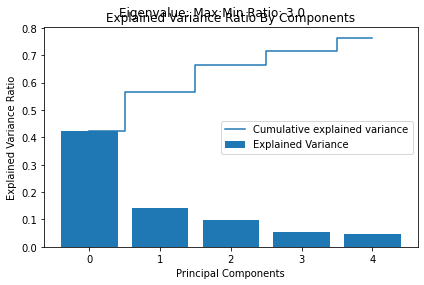

In [146]:
plt.bar(x_data, y_data, label='Explained Variance')
plt.step(x_data, sum_eig_values, where='mid',
         label='Cumulative explained variance')
plt.suptitle('Eigenvalue: Max:Min Ratio: {}'.format(
    np.round(pca.explained_variance_.max()/pca.explained_variance_.min())))
plt.title('Explained Variance Ratio By Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.tight_layout()


PCA 2D Projection

*   주축 2개로 차원 축소된 데이터 시각화해보기





In [129]:
pca = PCA(n_components=2)

In [130]:
pca.fit(X)

PCA(n_components=2)

In [131]:
pca.explained_variance_ratio_ 

array([0.42383478, 0.14064317])

In [132]:
Xnew = pca.transform(X)

In [133]:
Xnew

array([[ 7.94971618, -3.70191934],
       [ 6.03983752,  3.62183573],
       [ 3.79323131,  1.49578256],
       ...,
       [-3.32328568, -0.93051396],
       [-3.43361431,  1.61068284],
       [-4.83464733, -1.18008904]])

In [134]:
principalDf = pd.DataFrame(data = Xnew,
                           columns = ['principal component 1', 'principal component 2'])

In [135]:
principalDf

,principal component 1,principal component 2
0,7.949716,-3.701919
1,6.039838,3.621836
2,3.793231,1.495783
3,0.385878,-0.122292
4,0.164479,-0.988195
...,...,...
3039,-2.744926,-1.553212
3040,-3.719596,-0.234972
3041,-3.323286,-0.930514
3042,-3.433614,1.610683


In [136]:
finalDf = pd.concat([principalDf, playersselected[['Pos']]], axis=1)

In [137]:
finalDf

,principal component 1,principal component 2,Pos
0,7.949716,-3.701919,G
1,6.039838,3.621836,F
2,3.793231,1.495783,F
3,0.385878,-0.122292,G
4,0.164479,-0.988195,G
...,...,...,...
3039,-2.744926,-1.553212,G
3040,-3.719596,-0.234972,G
3041,-3.323286,-0.930514,G
3042,-3.433614,1.610683,G


Visualize 2D Projection

In [138]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel(finalDf.columns[0], fontsize = 15)
ax.set_ylabel(finalDf.columns[1], fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, '2 component PCA')

<IPython.core.display.Javascript object>

In [139]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel(finalDf.columns[0], fontsize = 15)
ax.set_ylabel(finalDf.columns[1], fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, '2 component PCA')

<IPython.core.display.Javascript object>

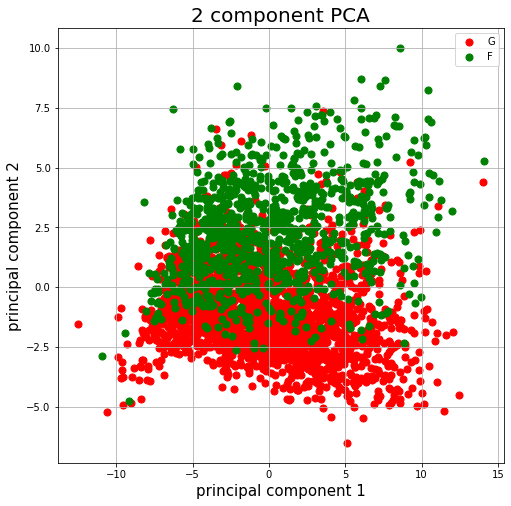

In [156]:
%matplotlib inline 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel(finalDf.columns[0], fontsize = 15)
ax.set_ylabel(finalDf.columns[1], fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = list(playersselected['Pos'].unique())
colors = ['r', 'g']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Pos'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s = 50)
    
ax.legend(targets)
ax.grid()
plt.show()

Visualize 3D Projection

In [157]:
pca = PCA(n_components=3)

In [158]:
pca.fit(X)

PCA(n_components=3)

In [160]:
X_new = pca.transform(X)

In [161]:
principalDf = pd.DataFrame(data = X_new,
                           columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [162]:
finalDf = pd.concat([principalDf, playersselected[['Pos']]], axis = 1)

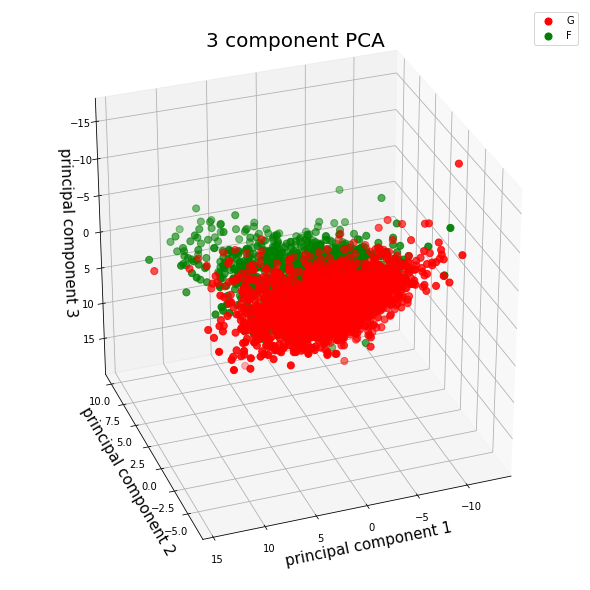

In [163]:
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, elev=-150, azim=110)

ax.set_xlabel(finalDf.columns[0], fontsize = 15)
ax.set_ylabel(finalDf.columns[1], fontsize = 15)
ax.set_zlabel(finalDf.columns[2], fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = list(playersselected['Pos'].unique())
colors = ['r', 'g']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Pos'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               finalDf.loc[indicesToKeep, 'principal component 3'],
               c = color,
               s = 50)
    
ax.legend(targets)
ax.grid()

t-SNE

*   2D



In [170]:
tsne = TSNE(n_components=2, n_iter=1000)


In [171]:
tsne_points = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [172]:
tsne_df = pd.DataFrame(data = tsne_points)

In [173]:
tsne_df

,0,1
0,10.930297,-62.536396
1,-32.912365,-45.516674
2,-15.227450,-38.449982
3,0.470119,-10.662404
4,4.038972,-11.864758
...,...,...
3039,22.410677,6.467937
3040,-7.751544,44.083885
3041,17.195210,47.573181
3042,-12.947152,23.985285


In [174]:
tsne_df2 = pd.concat([tsne_df, playersselected[['Pos']]], axis = 1)

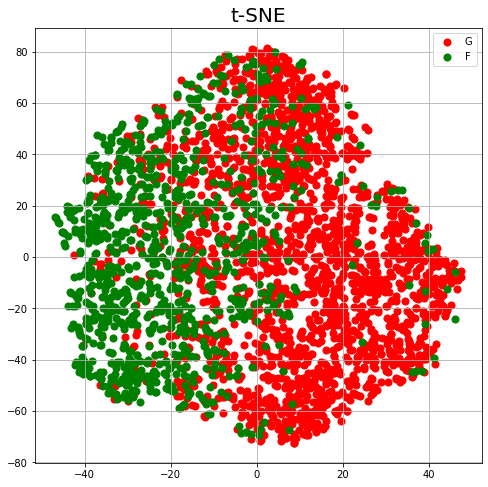

In [175]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_title('t-SNE', fontsize = 20)

targets = list(playersselected['Pos'].unique())
colors = ['r', 'g']
    
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Pos'] == target
    ax.scatter(tsne_df2.loc[indicesToKeep, 0],
               tsne_df2.loc[indicesToKeep, 1],
               c = color,
               s = 50)
    
ax.legend(targets)
ax.grid()

3D

In [176]:
tsne = TSNE(n_components=3, n_iter=1000)
tsne_points = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [177]:
tsne_df = pd.DataFrame(data = tsne_points)

In [180]:
tsne_df


,0,1,2
0,-1.563621,20.856005,11.645819
1,11.791337,15.557517,7.318518
2,4.783158,8.780840,9.388870
3,0.404072,5.546039,-1.894143
4,-1.217537,3.372616,1.351267
...,...,...,...
3039,-11.749917,2.275265,-9.399914
3040,3.271981,-13.572927,-3.619961
3041,-7.251746,-7.539453,-7.841886
3042,3.225785,-8.271764,-1.059670


In [181]:
tsne_df2 = pd.concat([tsne_df, playersselected[['Pos']]], axis = 1)

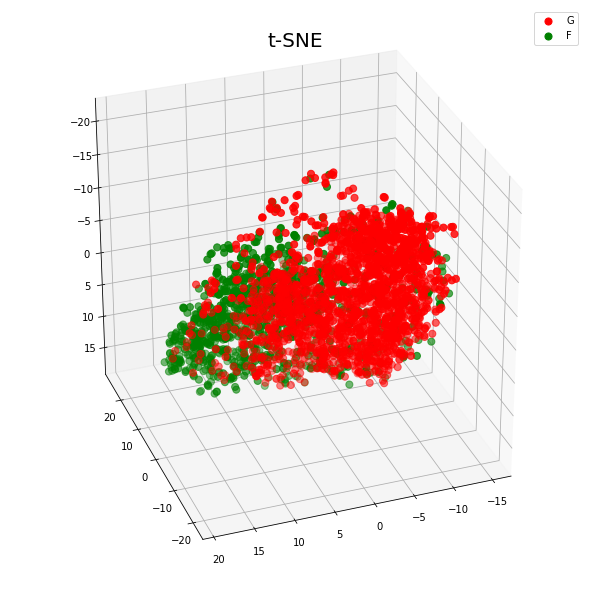

In [182]:
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, elev=-150, azim=110)
ax.set_title('t-SNE', fontsize = 20)

targets = list(playersselected['Pos'].unique())
colors = ['r', 'g']
    
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Pos'] == target
    ax.scatter(tsne_df2.loc[indicesToKeep, 0],
               tsne_df2.loc[indicesToKeep, 1],
               tsne_df2.loc[indicesToKeep, 2],
               c = color,
               s = 50)
    
ax.legend(targets)
ax.grid()